## Import libraries

In [86]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

## Load the dataset

Mall_Customers.csv

In [87]:
df = pd.read_csv('Mall_Customers.csv')

print(df.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


## Select relevant features for clustering

In [88]:
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

print(features.head())
print(len(features))

   Annual Income (k$)  Spending Score (1-100)
0                  15                      39
1                  15                      81
2                  16                       6
3                  16                      77
4                  17                      40
200


## Standardize the data

In [89]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

print(scaled_features[:5])

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]


## Perform hierarchical clustering

In [90]:
Z = linkage(scaled_features, method='ward')

print(Z[:5])

[[6.50000000e+01 6.80000000e+01 0.00000000e+00 2.00000000e+00]
 [4.80000000e+01 4.90000000e+01 0.00000000e+00 2.00000000e+00]
 [1.56000000e+02 1.58000000e+02 0.00000000e+00 2.00000000e+00]
 [1.29000000e+02 1.31000000e+02 0.00000000e+00 2.00000000e+00]
 [1.70000000e+02 1.74000000e+02 3.81694292e-02 2.00000000e+00]]


## Plot the dendrogram

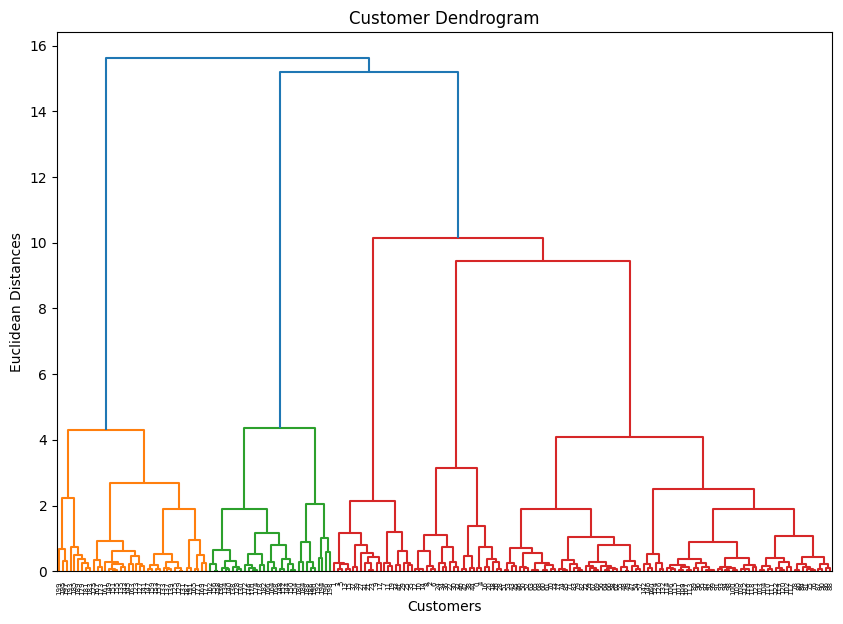

In [91]:
plt.figure(figsize=(10, 7))
plt.title("Customer Dendrogram")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distances")
dendrogram(Z)
plt.show()


##Dendrogram and Cutting the Tree
Think of a dendrogram like a family tree but for clusters. It helps you see how clusters (groups) are formed and combined. Here’s a simple way to understand how to determine the best place to cut it:

1. Dendrogram Basics
Dendrogram: This is a diagram that shows how different items (like marbles) are grouped together based on their similarities.

  Branches: The branches show how marbles are combined into groups.

  Height: The vertical height of the branches represents the distance or dissimilarity between groups. Higher branches mean the groups are less similar.

2. Finding the Cut Point
Imagine you have a tree, and you want to decide where to cut it to get the best clusters:

  Plot the Dendrogram: Draw the tree diagram to see how items are grouped.

  Look for the Longest Vertical Line: In the tree, find the tallest vertical line. This line represents where the groups are combined at the highest distance.

  * Why It Matters: The tallest vertical line represents a big jump in distance
  between groups. Cutting here helps you find a natural number of clusters because you’re splitting where the distance between groups is the greatest.
  
  Make the Cut: Draw a horizontal line at the height of the longest vertical line.

Count the Groups: The number of branches below this line tells you how many clusters you should have.

##Key Points to Remember
* Dendrogram: A diagram showing how items are grouped.
* Longest Vertical Line: Represents a big jump in dissimilarity.
* Cutting the Tree: The place where you cut the tree determines the number of clusters.

In [92]:
# There ara 5 branches according to the Dendrogram and cutting the tree
num_clusters = 5
clusters = fcluster(Z, num_clusters, criterion='maxclust')

## Add the cluster labels to the original dataframe

In [93]:
df['Cluster'] = clusters

In [94]:
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

     Cluster  
0          4  
1          3  
2          4  
3          3  
4          4

In [95]:
df.drop(columns=['CustomerID', 'Gender', 'Age'], inplace=True)

## Display the analysis

In [96]:
# Group by cluster and calculate mean values
cluster_analysis = df.groupby('Cluster').mean()

print("Cluster Analysis:\n\n", cluster_analysis)

Cluster Analysis:

          Annual Income (k$)  Spending Score (1-100)
Cluster                                            
1                 86.538462               82.128205
2                 89.406250               15.593750
3                 25.095238               80.047619
4                 26.304348               20.913043
5                 55.811765               49.129412


## Plot the clusters





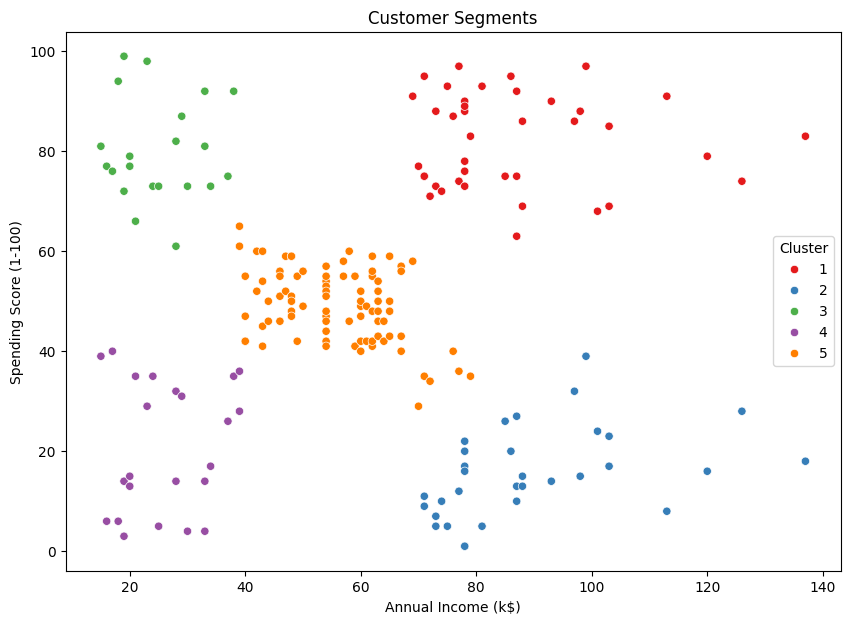

In [97]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments')
plt.show()

## Calculate the silhouette score

In [98]:
silhouette_avg = silhouette_score(scaled_features, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

Silhouette Score: 0.55
